In [3]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("gti-upm/leapgestrecog")

print("Path to dataset files:", path)

100%|██████████| 2.13G/2.13G [00:13<00:00, 168MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1


In [4]:
import os

dataset_path = '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1'
print("Directory exists:", os.path.exists(dataset_path))

Directory exists: True


In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import MobileNetV2

# Path to dataset
dataset_path =  '/root/.cache/kagglehub/datasets/gti-upm/leapgestrecog/versions/1' # Change this if your dataset is elsewhere

# Data augmentation and loading
image_size = (128, 128)
batch_size = 32

datagen = ImageDataGenerator(
    rescale=1.0/255.0,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    validation_split=0.2
)

train_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_gen = datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Model definition
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(128, 128, 3))
base_model.trainable = False

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    BatchNormalization(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(train_gen.num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Train model
history = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

# Fine-tuning
base_model.trainable = True  # Unfreeze base model for fine-tuning
model.compile(optimizer=Adam(learning_rate=1e-5), loss='categorical_crossentropy', metrics=['accuracy'])

history_fine = model.fit(
    train_gen,
    validation_data=val_gen,
    epochs=5
)

# Save the model for later use
model.save('/content/hand_symbol_model.h5')



Found 32000 images belonging to 2 classes.
Found 8000 images belonging to 2 classes.
9406464/9406464 [==============================] - 0s 0us/step
Epoch 1/5
1000/1000 [==============================] - 245s 242ms/step - loss: 0.8008 - accuracy: 0.4927 - val_loss: 0.7025 - val_accuracy: 0.5024
Epoch 2/5
1000/1000 [==============================] - 245s 245ms/step - loss: 0.7020 - accuracy: 0.4932 - val_loss: 0.6972 - val_accuracy: 0.5075
Epoch 3/5
1000/1000 [==============================] - 239s 239ms/step - loss: 0.6980 - accuracy: 0.5000 - val_loss: 0.6950 - val_accuracy: 0.5035
Epoch 4/5
1000/1000 [==============================] - 235s 235ms/step - loss: 0.6959 - accuracy: 0.4957 - val_loss: 0.6941 - val_accuracy: 0.5004
Epoch 5/5
1000/1000 [==============================] - 236s 236ms/step - loss: 0.6946 - accuracy: 0.4984 - val_loss: 0.6939 - val_accuracy: 0.4936
Epoch 1/5
1000/1000 [==============================] - 358s 346ms/step - loss: 0.6934 - accuracy: 0.4988 - val_loss: 

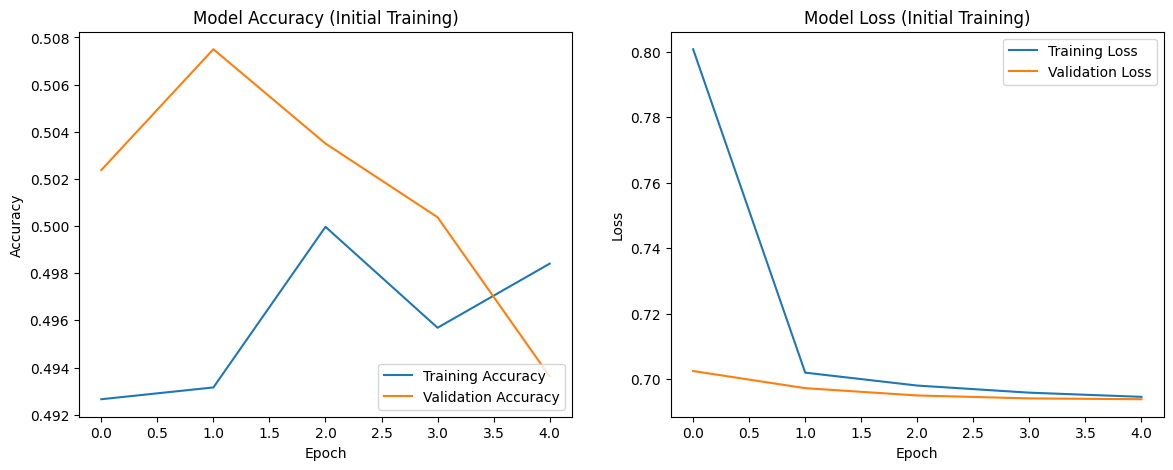

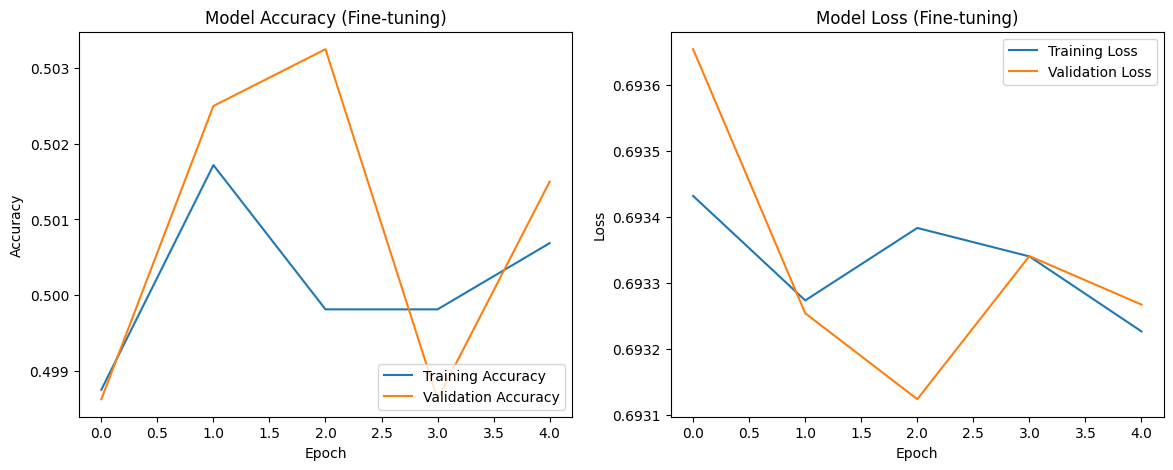

In [6]:
import matplotlib.pyplot as plt

# Plotting function for training and validation accuracy/loss
def plot_history(history, title_suffix=""):
    # Accuracy plot
    plt.figure(figsize=(14, 5))

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.show()

# Plot initial training history
plot_history(history, title_suffix="(Initial Training)")

# Plot fine-tuning training history
plot_history(history_fine, title_suffix="(Fine-tuning)")


In [9]:

# prompt: resize the graph to small

# Plotting function for training and validation accuracy/loss
def plot_history(history, title_suffix=""):
    # Accuracy plot
    plt.figure(figsize=(8, 4))  # Adjust figure size here

    # Plot training & validation accuracy
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Model Accuracy {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')

    # Plot training & validation loss
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Model Loss {title_suffix}')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(loc='upper right')

    plt.tight_layout() # Improves subplot spacing
    plt.show()